# Linear Regression House Pricing
In this notebook we will use sklearn to implement a linear regression model to predict USA housing price.

In [37]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [7]:
# Read the dataset
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [15]:
# Some statistics about our dataset
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


We can use seaborn to plot the correlation betweeen each predictor in order to get some useful informations about the datatset

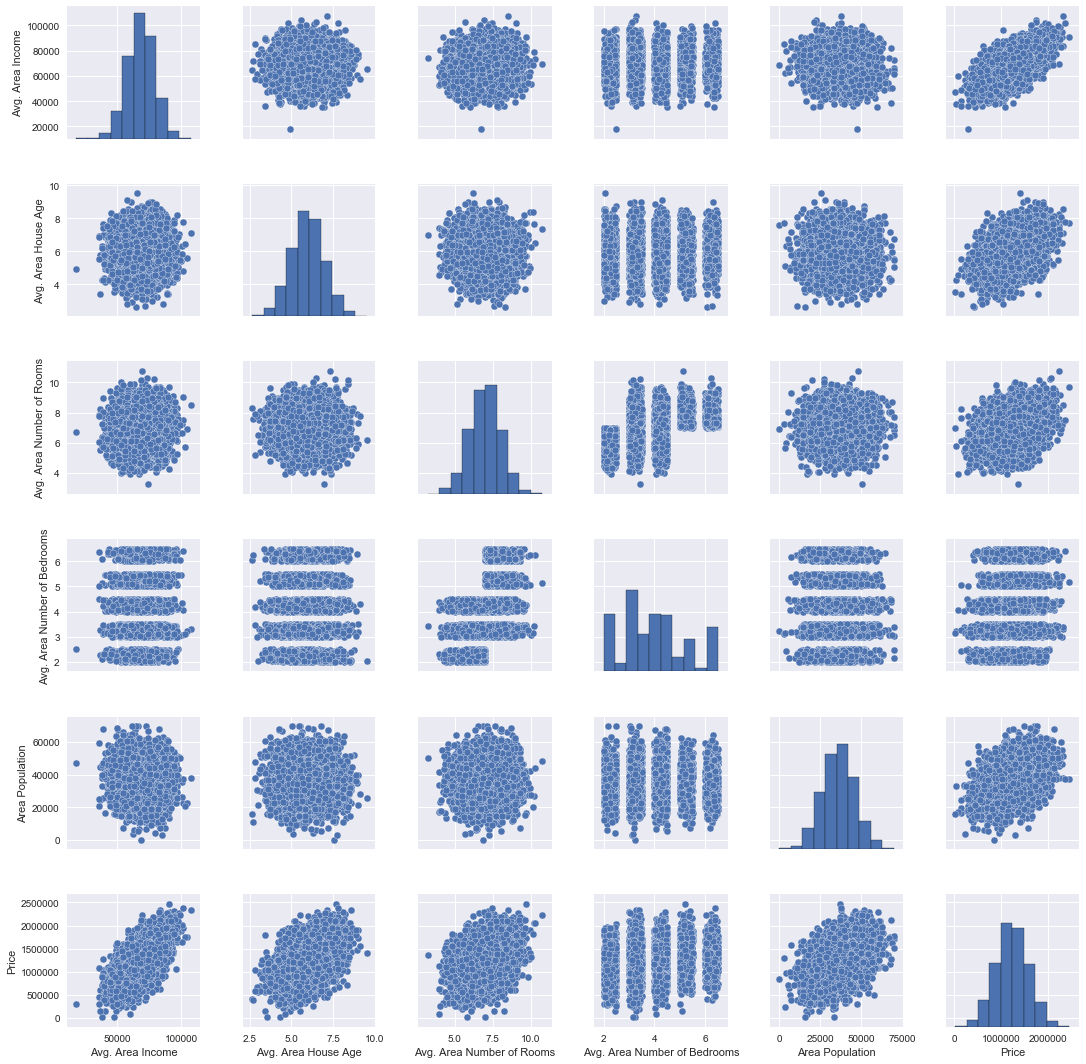

In [69]:
sns.set()
plt.rcParams["patch.force_edgecolor"] = True
sns.pairplot(df)

From the histogram located on the diagonal, we can notice that everythong is more or less normally distributed except the average number of bedrooms.

Since our goal is to predict the price of the house, we will try to analize the distribution of this variable.

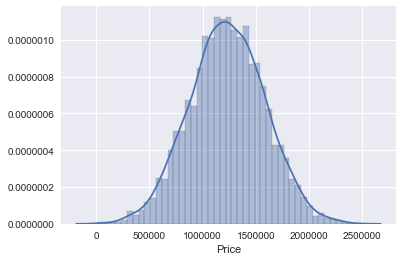

In [20]:
# Distribution of the Price
sns.distplot(df['Price'])

From this graph we can notice that the prices are normally distributed and that the average price is between 1 million and 1.5 million 

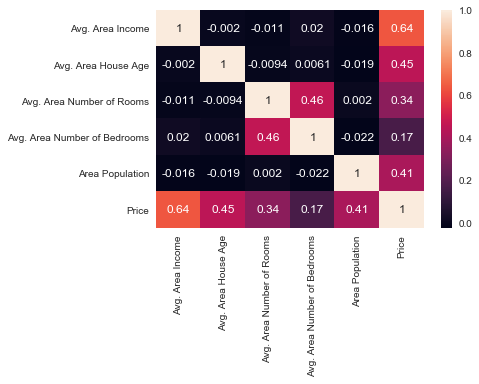

In [24]:
# Correlation matrix
correlation = df.corr()
sns.heatmap(correlation,annot = True)

In [40]:
X = df.drop(['Price','Address'], axis = 1)
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [41]:
# Target variable
y = df['Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

Now we can use sklearn to split the dataset in train and test set. We will use 60% of the data as training and 40% as test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [45]:
# Fit the linear regression model on the training set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print('Intercept: ' + str(lm.intercept_))

Intercept: -2640159.79685


In [54]:
# Create a dataframe contsining the regression coefficients
coeff = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
coeff

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


This coefficients can be explained in the following way. For example a 1 unit increase in Avg. Area Income is associated with a 21.528276 dollars increase in the Price. This is valid for all the coefficients 

## Predictions

Now we can use the X_test dataset to make predictions and compare the predictions with the y_test

In [57]:
predictions = lm.predict(X_test)
predictions

array([ 1260960.70567626,   827588.75560352,  1742421.24254328, ...,
         372191.40626952,  1365217.15140895,  1914519.54178824])

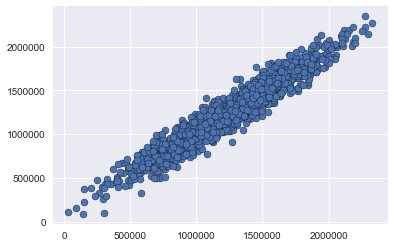

In [67]:
# Plot the predicted data
plt.scatter(y_test, predictions, edgecolors = 'black' )

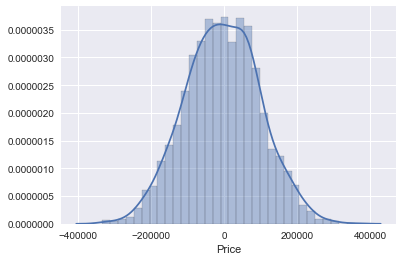

In [71]:
# Histogram of the residuals
sns.distplot((y_test - predictions))

From this plot we can see that the residual are normally distributed. This is a good sign that the model we have chosen is appropriate. If the residual are not normally distributed, maybe the linear regression is not the best model for our dataset

## Results Evaluation

In [73]:
from sklearn import metrics

In [78]:
# Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, predictions)

In [80]:
# Mean Squared Error
MSE = metrics.mean_squared_error(y_test, predictions)

In [83]:
# Root Mean Squared Error
RMSE = np.sqrt(MSE)

In [87]:
# Results
print('MAE: ' + str(MAE))
print('MSE: ' + str(MSE))
print('RMSE: ' + str(RMSE))

MAE: 82288.2225191
MSE: 10460958907.2
RMSE: 102278.829223
